In [86]:
# Bayesian Computing lab at Autumn School Deep Learning, 
# Jonas Latz, U. Manchester, 2023

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt



Part I: Sample some Gaussian processes

In [ ]:
# Let's start by defining some Gaussian random field
ell = 0.07 #length scale

def c(x,y): # covariance function
    #return np.exp(-abs(x-y)/ell) #exponential kernel
    return np.exp(-((x-y)**2)/(2*(ell**2)))#Gaussian kernel
      
# Discretise Covariance kernel
n = 200
x = np.linspace(0,1,n) # spatial discretisation
C = np.zeros([n,n])

for i in range(n):
        for j in range(n):
            C[i,j] = c(x[i],x[j])

# Sample using PCA (necessary especially for the Gaussian kernel, as C is very badly conditioned)
eival, eivec = np.linalg.eig(C)
eival = np.real(eival)
eivec = np.real(eivec)
eivec = eivec[:,eival > 1E-7]
eival = eival[eival > 1E-7]
k = len(eival)

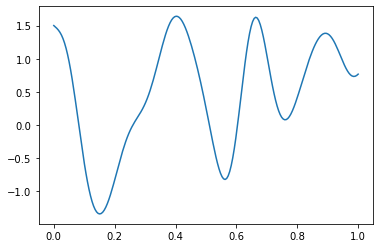

In [87]:
# Sample GP(0,c) (or rather N(0,C)) and plot

F = np.dot(eivec,np.sqrt(eival)*np.random.normal(size=k))

plt.plot(x,F)
plt.show()

Part II: MCMC sampling of 'simple' densities

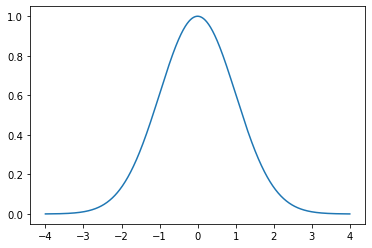

In [135]:
# Let's run some MCMC next!

# some 'log-posteriors' in 1D to play with
def logpi(f):
    return -0.5*f**2 #standard Gaussian, mean = 0, var = 1
    #return sp.special.logsumexp([(-8*(f-1)**2),(-8*(f+1)**2)]) #Gaussian mixture, mean = 0, var = 1.0625(?!)

# plot density
x = np.linspace(-4,4,1000)
x_plot = np.zeros(1000)
for i in range(1000):
    x_plot[i] = np.exp(logpi(x[i]))

plt.plot(x,x_plot)
plt.show()


Acceptance rate: 0.50183
Mean: 0.008890386316021208
Variance: 0.9946181051421784


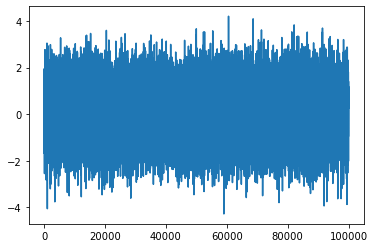

In [137]:
# Use random Walk Metropolis
N_MCMC = 100000 # number of steps 
F_samples = np.ones(N_MCMC) # zero vector for the chain
gamma = 2 # standard deviation of the proposal # TRY ADJUSTING THIS TO OBTAIN acceptance rate = 0.5
accepted  = 0 # count acceptance steps

for i in range(1,N_MCMC):
    prop = F_samples[i-1] + gamma*np.random.normal(size=1) #propose
    logalpha = logpi(prop)-logpi(F_samples[i-1])
    if logalpha > np.log(np.random.uniform()): # Accept!
        F_samples[i] = prop
        accepted +=1
    else: # Reject!
        F_samples[i] = F_samples[i-1]
        
print('Acceptance rate: '+str(accepted/N_MCMC))
print('Mean: '+str(np.mean(F_samples)))
print('Variance: '+str(np.var(F_samples)))

plt.plot(F_samples)
plt.show()